<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression

<font size=5><p style="color:purple"> EDA and Visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>We have 0 missing values which is very good.
Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors 

Text(0.5, 1.0, 'Distribution of Charges')

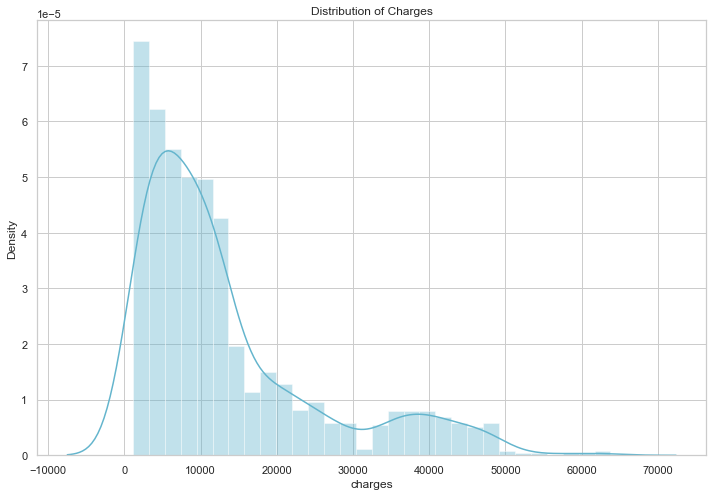

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<font size='2' font>This distribution is right-skewed. To make it closer to normal we can apply natural log 

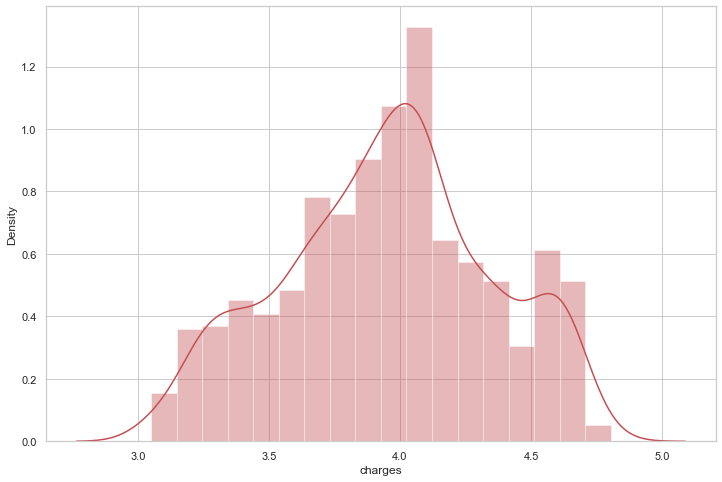

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<font size=2> Now let's look at the charges by region

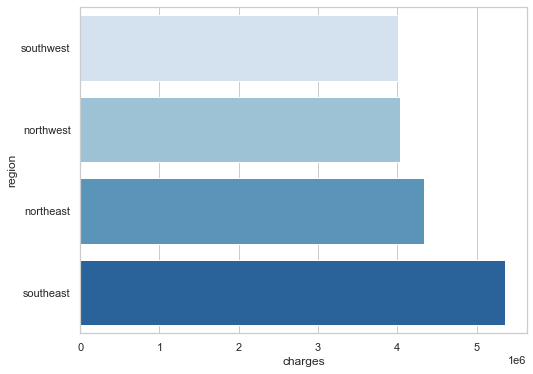

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

<font size='2' font>So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region 

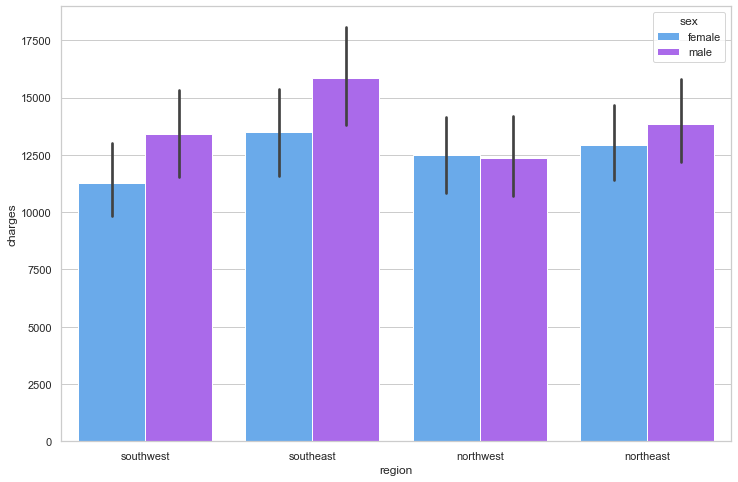

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

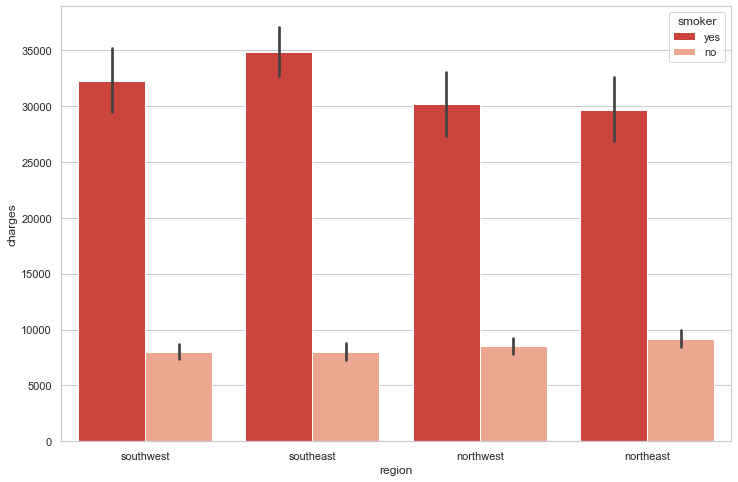

In [11]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

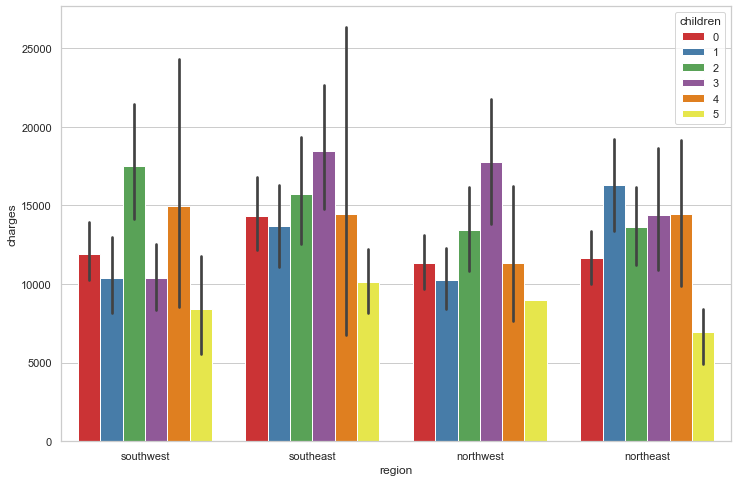

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

<font size='2' font>Now let's analyze the medical charges by age, bmi and children according to the smoking factor 

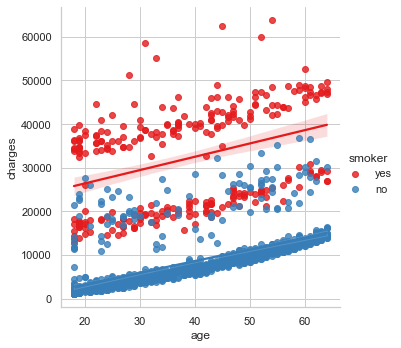

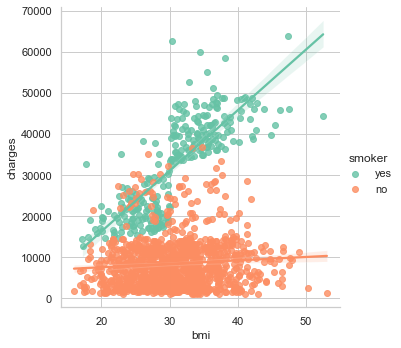

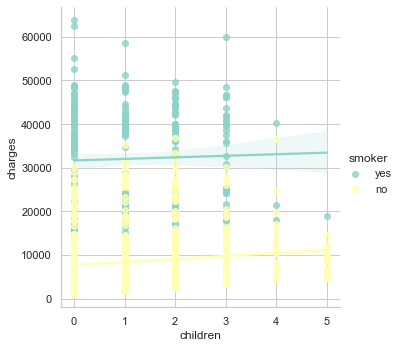

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

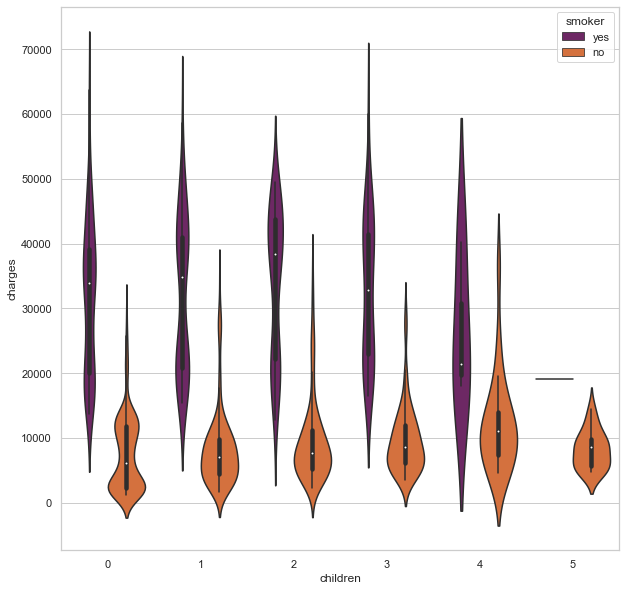

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [15]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


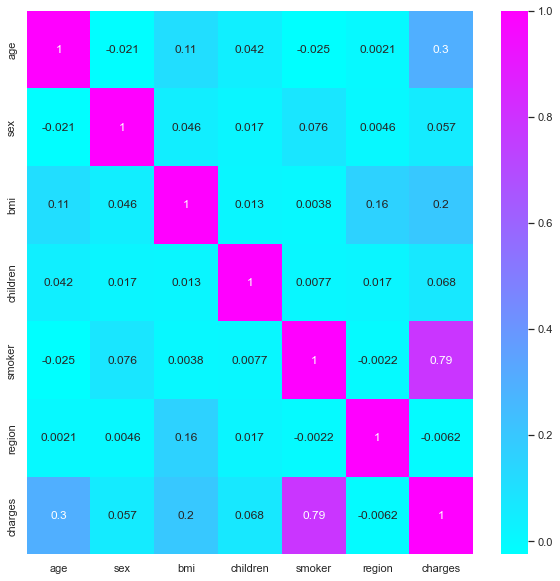

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>No correlation, except with the smoking 

## データ確認

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## light GBM

In [20]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
train_x, test_x, train_y, test_y = holdout(x, y, test_size=0.2, random_state=0)

LightGBM用にデータを加工する。
lgb.Datasetを使い、学習用・テスト用データに作成したデータを加工。

In [21]:
import lightgbm as lgb
lgb_train = lgb.Dataset(train_x, train_y)
lgb_test  = lgb.Dataset(test_x, label=test_y)

In [22]:
params = {'objective':'rmse',
          'metrics':'rmse',
          'random_state':1}
num_round = 50

In [23]:
model = lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test],
                  verbose_eval=50,
                  num_boost_round=num_round,
                  valid_names=['train','test'])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13201.182046
[50]	train's rmse: 3549.45	test's rmse: 4134.03


In [24]:
from sklearn.metrics import mean_squared_error
pred = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,pred))
print(score)

4134.032767758462


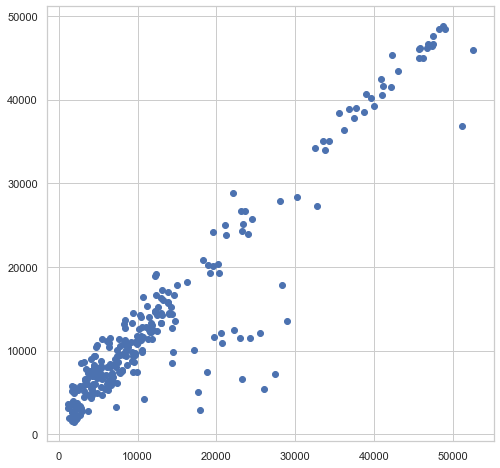

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(test_y, pred)

## Light GBM２

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

# 交差検証用
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [27]:
# 評価関数RMSE
def rmse(test_y, pred):
    #RMSEを算出
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print('rmse', rmse)
    
    return rmse

In [28]:
from lightgbm import LGBMRegressor 

# モデルのインスタンスを作成する
lgb = LGBMRegressor(random_state = 0)

# パラメータの学習範囲を指定する
# とても時間がかかります。範囲を狭めた方が学習は早いです。
lgb_params = {
    'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'],
    'objective': ['regression'],
    'metric' : ['rmse'],
    'max_depth' : [i for i in range(4,14, 1)],
    'num_leaves' : [i for i in range(15,36,5)],
    'reg_lambda' : np.logspace(-3,-1, num=2)
}

# パラメータチューニング
# estimator : モデルのインスタンス
# param_grid : パラメータの探索範囲
# scoring : スコアを出す評価関数
# cv : 交差検証の回数
lgb_cv = GridSearchCV(estimator = lgb, param_grid = lgb_params,scoring = make_scorer(rmse, greater_is_better = False), cv = kf)

# 評価
lgb_cv.fit(train_x,  train_y)

lgb_cv.best_params_

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1641600046169/work/compile/src/boosting/rf.hpp, line 35 .



{'boosting_type': 'gbdt',
 'max_depth': 4,
 'metric': 'rmse',
 'num_leaves': 15,
 'objective': 'regression',
 'reg_lambda': 0.001}

In [29]:
# best_params_で表示されたパラメータを代入
lgb_best = LGBMRegressor(
    boosting_type = lgb_cv.best_params_['boosting_type'],
    max_depth = lgb_cv.best_params_['max_depth'],
    metric = lgb_cv.best_params_['metric'],
    num_leaves = lgb_cv.best_params_['num_leaves'],
    objective = lgb_cv.best_params_['objective'],
    reg_lambda = lgb_cv.best_params_['reg_lambda'],
    random_state = 0,
    # 特徴重要度計算のロジック
    importance_type='gain'  
)

# 評価
lgb_best.fit(train_x, train_y)

# テストデータを予測する
pred = lgb_best.predict(test_x)

In [30]:
# feature importances
fi = lgb_best.feature_importances_
fi_data = pd.DataFrame({'feature': list(train_x.columns),
                       'feature importance': fi[:]}).sort_values('feature importance', ascending = False)
fi_data

,feature,feature importance
4,smoker,4.879474e+11
2,bmi,1.361328e+11
0,age,8.843328e+10
3,children,7.240517e+09
5,region,3.149996e+09
1,sex,6.359553e+08


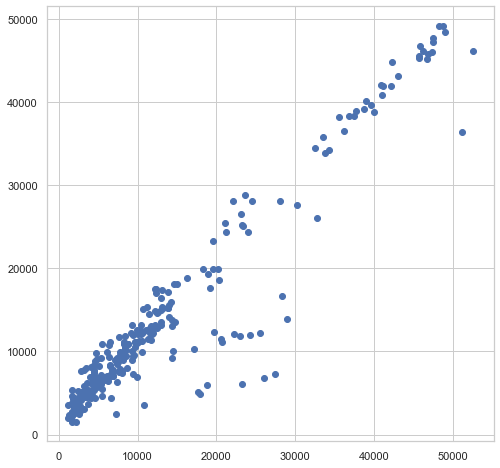

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(test_y, pred)

In [33]:
import pickle
with open('lgb_best.pickle', mode='wb') as fp:
    pickle.dump(lgb_best, fp)